# 🌲 Random Forest Classifier

---

## 🧩 1. What is Random Forest?

> Random Forest is an **ensemble learning** method that builds **multiple decision trees** and combines their results to make a final prediction.  
> For classification → takes the **majority vote** of all trees.

It reduces **overfitting** and **increases accuracy** by learning from multiple data samples and feature subsets.

---

## ⚙️ 2. How It Works (Step-by-Step)

1. **Bootstrapping (Sampling)**  
   - Randomly pick a subset of the training data *with replacement* for each tree.  
   - Each tree sees slightly different data.

2. **Random Feature Selection**  
   - At each node split, only a random subset of features is considered.  
   - This prevents dominant features from biasing all trees.

3. **Tree Building**  
   - Each tree is trained independently on its own subset of data and features.  
   - Usually allowed to grow deep (no pruning).

4. **Ensemble Prediction**  
   - Classification → majority vote of all trees.  
   - Regression → average of all tree predictions.


---
## Example

<img src="../images/Random-Forest.webp">

- Actually in Decission tree, only 1 model used to predict something, & used to give one result 
- but here we r askign same question to many Decision tree models , so obviously everyone might give different results
- Then, finally Random forest model will chose that result which would be given by **MAJORITY** Decision tree models 
- Finally that would be the final result 


---

## 💡 3. Why It’s Better than a Single Decision Tree

| Problem in Decision Tree | How Random Forest Fixes It |
|---------------------------|----------------------------|
| Overfits easily | Averages multiple trees to reduce variance |
| Sensitive to noise | Different trees cancel out random errors |
| Biased toward strong features | Random feature selection balances it |
| Unstable | More consistent across runs |

---

## 🔧 4. Important Hyperparameters

| Parameter | Description | Typical Values |
|------------|--------------|----------------|
| `n_estimators` | Number of trees in the forest | 100–500 |
| `max_depth` | Max depth of each tree | 4–10 (prevents overfitting) |
| `min_samples_split` | Minimum samples to split a node | Default: 2 |
| `min_samples_leaf` | Minimum samples at a leaf node | Default: 1 |
| `max_features` | No. of features considered per split | `"sqrt"` for classification |
| `class_weight` | Adjusts for imbalanced data | `"balanced"` |
| `random_state` | Reproducibility seed | 42 |

---

## 🧠 5. Evaluation Metrics (for Classification)

- **Confusion Matrix** → Shows True/False Positives/Negatives  
- **Accuracy** → Overall correctness  
- **Precision** → How many predicted positives were correct  
- **Recall** → How many actual positives were caught  
- **F1-Score** → Harmonic mean of precision & recall

> Prefer **Recall** and **F1-score** when dealing with imbalanced datasets.

---

## 📊 6. Feature Importance

You can check which features matter most:

```python
rf.feature_importances_
```

To visualize top 10 features:
```python
pd.Series(rf.feature_importances_, index=X.columns).nlargest(10).plot(kind='barh')

```

Helps understand which inputs influenced predictions the most.

## ⚡ 7. Pros & Cons

| ✅ Advantages                              | ❌ Disadvantages                      |
| ----------------------------------------- | ------------------------------------ |
| High accuracy and generalization          | Slower for large datasets            |
| Handles both numerical & categorical data | Less interpretable                   |
| Works well without scaling                | Memory-intensive                     |
| Robust to missing data and noise          | Doesn’t extrapolate beyond seen data |


## 🧪 8. Common Use Cases

- Customer churn prediction

- Loan approval classification

- Fraud detection

- Medical diagnosis

- Sentiment analysis

- Spam detection


## 🧮 9. Key Intuition

Each tree gives a “vote.”
The Random Forest listens to all — the wisdom of the crowd.
That’s why it performs better than one overconfident Decision Tree.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../datasets/loan_approval_data.csv")

X = df.drop("Approved", axis=1)
y = df["Approved"]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
rf = RandomForestClassifier(
    n_estimators=100, max_depth=6, class_weight="balanced", random_state=42
)

rf.fit(X_train, y_train)

y_pred=rf.predict(X_test)

In [5]:
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n",cr)

Confusion Matrix:
 [[71 23]
 [33 73]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.76      0.72        94
           1       0.76      0.69      0.72       106

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200



## Here How to read Classification Report ?

**Confusion Matrix**

- 71: Correctly predicted as "Denied" (true negatives)
- 23: Actually "Denied" but predicted "Approved" (false positives)
- 33: Actually "Approved" but predicted "Denied" (false negatives)
- 73: Correctly predicted as "Approved" (true positives)

**Performance by Class**

 Class 0 (Loan DENIED):

    Precision: 0.68 → 68% of predicted "denied" were actually denied
    Recall: 0.76 → 76% of actual "denied" cases were caught
    F1-Score: 0.72 → Good balance of precision and recall

 Class 1 (Loan APPROVED):
 
    Precision: 0.76 → 76% of predicted "approved" were actually approved
    Recall: 0.69 → 69% of actual "approved" cases were caught
    F1-Score: 0.72 → Good balance of precision and recall


**Overall Performance:**

- Accuracy: 72% → 72% of all predictions were correct
- Macro Average: 0.72 → Average of both classes
- Weighted Average: 0.72 → Considers class sizes

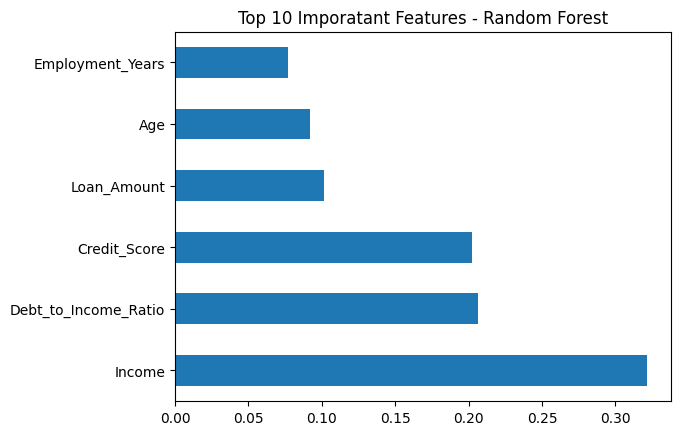

In [6]:
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.nlargest(10).plot(kind="barh")
plt.title("Top 10 Imporatant Features - Random Forest")
plt.show()